### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q1: My Answer

**Likelihood**

For a Binomial distribution with parameters $\theta$ and n trials, the probability of observing x successes is given by:

\begin{align*}
p(x | \theta, n) = \binom{n}{x} \theta^x (1-\theta)^{n-x}
\end{align*}

where:
- n is the total number of trials.
- x is the number of successes.

**Prior**

For the discrete uniform prior given:

\begin{align*}
p(\theta) = \begin{cases}
\frac{1}{101}, & \text{for } \theta = \frac{i}{100}, \quad i = 0, 1, \ldots, 100 \\
0, & \text{otherwise}
\end{cases}
\end{align*}

**Posterior**

According to Bayes' Theorem, the posterior distribution is:

\begin{align*}
p(\theta | x, n) = \frac{p(x | \theta, n) \cdot p(\theta)}{p(x)}
\end{align*}

Substituting the expressions for the likelihood and the prior, we get:

\begin{align*}
p(\theta | x, n) \propto \binom{n}{x} \theta^x (1-\theta)^{n-x} \cdot \frac{1}{101}
\end{align*}

Since $\binom{n}{x}$ and $\frac{1}{101}$ are constants with respect to $\theta$, they can be ignored for proportionality:

\begin{align*}
p(\theta | x, n) \propto \theta^x (1-\theta)^{n-x}
\end{align*}

So the posterior distribution is a discrete distribution over $\theta$ where $\theta \in \{0, 0.01, 0.02, \ldots, 1.00\}$. This means that the posterior probabilities for each discrete $\theta$ value are proportional to $\theta^x (1-\theta)^{n-x}$.

**Visualization of posterior distribution**

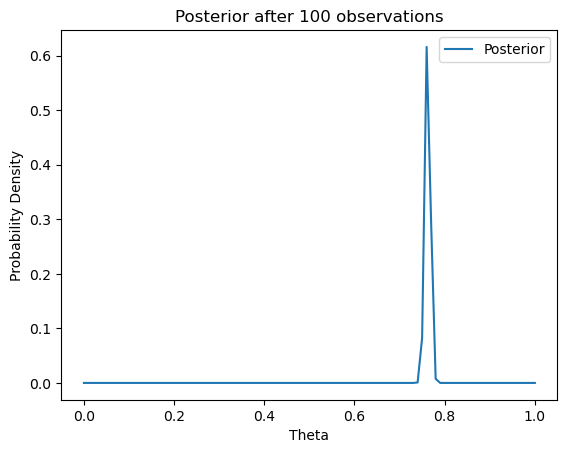

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Number of observations
n_observations = 100

# Prior: Discrete Uniform over {0, 1/100, 2/100, ..., 100/100}
theta_values = np.linspace(0, 1, 101)
prior = np.ones(len(theta_values)) / len(theta_values)

# Function to update posterior
def update_posterior(prior, data):
    likelihood = binom.pmf(sum(data), len(data), theta_values)
    posterior = likelihood * prior
    posterior /= posterior.sum()  # Normalize to make it a proper distribution
    return posterior

# Initial data and prior
data = []
posterior = prior

# Sequentially update the posterior with each new observation
for i in range(n_observations):
    # Simulate a new observation (Bernoulli trial with true theta = 0.7)
    new_observation = np.random.binomial(1, 0.7)
    data.append(new_observation)
    
    # Update posterior
    posterior = update_posterior(posterior, data)

# Plot the final posterior distribution
fig, ax = plt.subplots()
ax.set_xlabel('Theta')
ax.set_ylabel('Probability Density')
ax.plot(theta_values, posterior, label='Posterior')
ax.legend()
ax.set_title(f'Posterior after {n_observations} observations')
plt.show()

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q2: My Answer
**To answer Q2.1, this is a Beta distribution. And below are some visualizations demonstrating the learning process that the algorithm undergoes.**

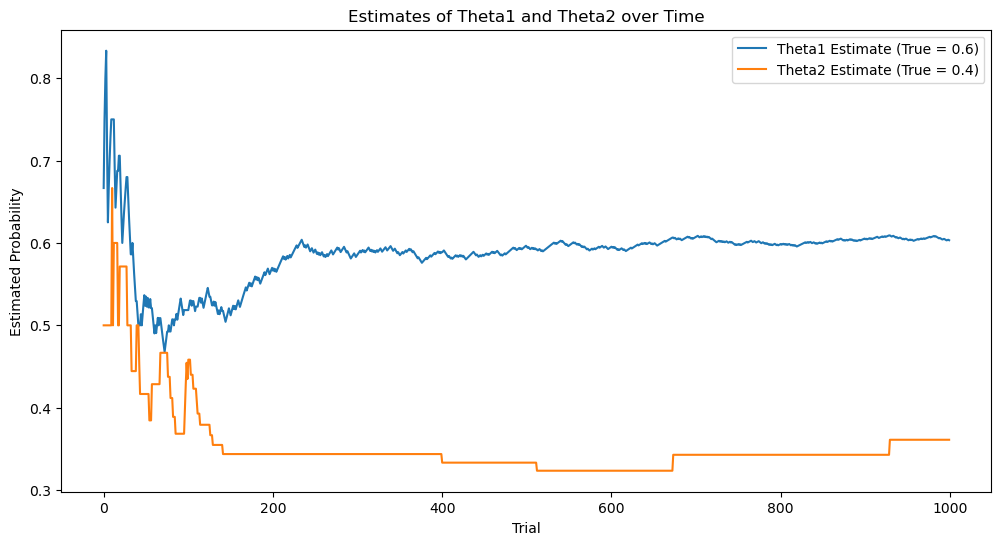

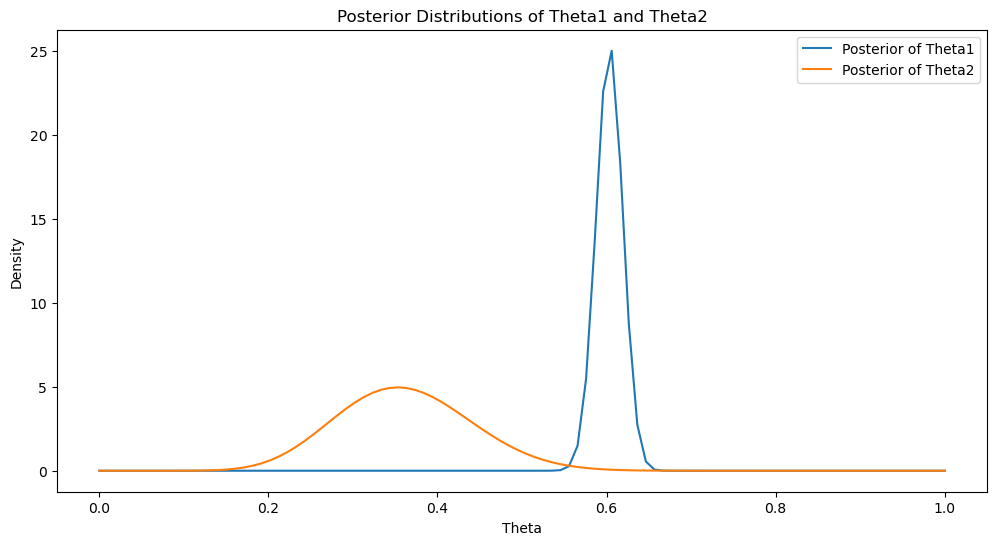

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(100765)

# Hypothetically true probabilities for the two arms
theta1_true = 0.6
theta2_true = 0.4

m = 1000

# Prior parameters (alpha and beta) for Beta distributions
alpha = 1
beta_param = 1

# Bayesian Multi-Armed Bandit Algorithm
n1 = 0
x1 = 0
n2 = 0
x2 = 0
theta1_estimates = []
theta2_estimates = []

for t in range(m):
    # Sample from the posterior distributions
    theta1_sample = np.random.beta(alpha + x1, beta_param + n1 - x1)
    theta2_sample = np.random.beta(alpha + x2, beta_param + n2 - x2)
    
    # Choose the arm with the higher sampled value
    if theta1_sample > theta2_sample:
        chosen_arm = 1
        reward = np.random.binomial(1, theta1_true)
        n1 += 1
        x1 += reward
    else:
        chosen_arm = 2
        reward = np.random.binomial(1, theta2_true)
        n2 += 1
        x2 += reward
    
    # Update estimates
    theta1_estimates.append((alpha + x1) / (alpha + beta_param + n1))
    theta2_estimates.append((alpha + x2) / (alpha + beta_param + n2))

# Plot the estimates over time
plt.figure(figsize=(12, 6))
plt.plot(theta1_estimates, label='Theta1 Estimate (True = 0.6)')
plt.plot(theta2_estimates, label='Theta2 Estimate (True = 0.4)')
plt.xlabel('Trial')
plt.ylabel('Estimated Probability')
plt.title('Estimates of Theta1 and Theta2 over Time')
plt.legend()
plt.show()

# Plot the final posterior distributions
theta_values = np.linspace(0, 1, 100)
posterior_theta1 = beta.pdf(theta_values, alpha + x1, beta_param + n1 - x1)
posterior_theta2 = beta.pdf(theta_values, alpha + x2, beta_param + n2 - x2)

plt.figure(figsize=(12, 6))
plt.plot(theta_values, posterior_theta1, label='Posterior of Theta1')
plt.plot(theta_values, posterior_theta2, label='Posterior of Theta2')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Posterior Distributions of Theta1 and Theta2')
plt.legend()
plt.show()

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

### Q3: My Answer
#### Analysis 1

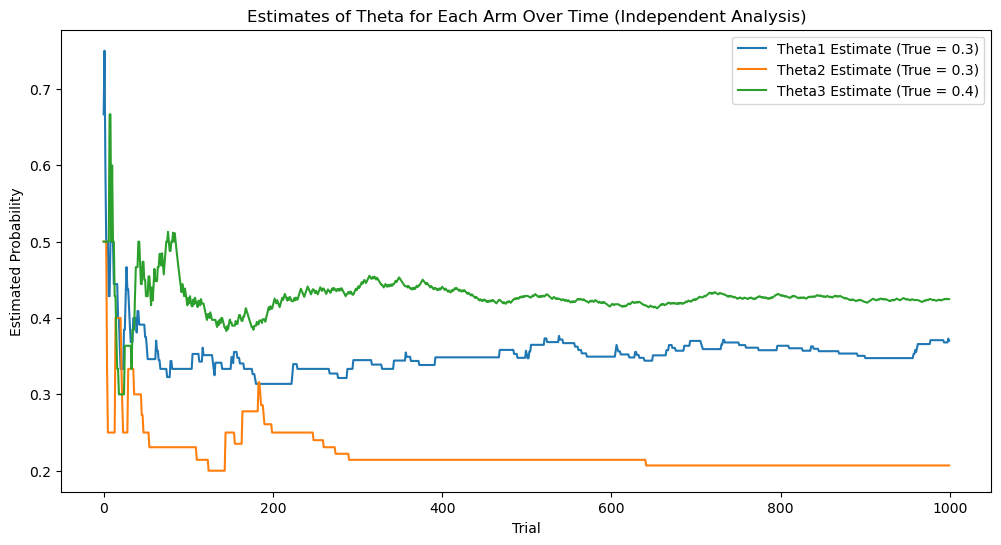

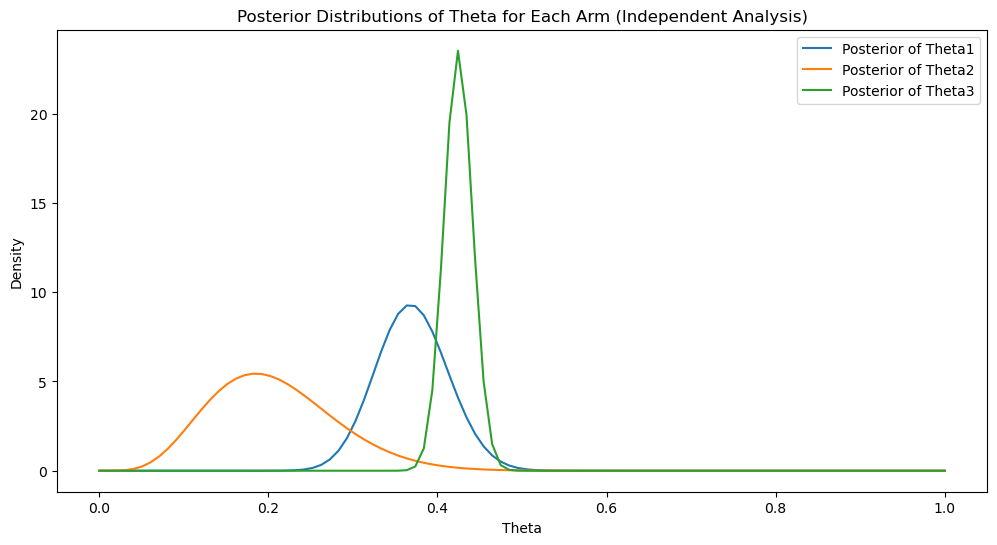

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(100765)

# Hypothetically true probabilities for the three arms
theta_true = [0.3, 0.3, 0.4]

m = 1000

# Prior parameters (alpha and beta) for Beta distributions
alpha = 1
beta_param = 1

# Bayesian Multi-Armed Bandit Algorithm
n = [0, 0, 0]
x = [0, 0, 0]
theta_estimates = [[] for _ in range(3)]

for t in range(m):
    theta_samples = [np.random.beta(alpha + x[i], beta_param + n[i] - x[i]) for i in range(3)]
    chosen_arm = np.argmax(theta_samples)
    reward = np.random.binomial(1, theta_true[chosen_arm])
    n[chosen_arm] += 1
    x[chosen_arm] += reward
    
    for i in range(3):
        theta_estimates[i].append((alpha + x[i]) / (alpha + beta_param + n[i]))

# Plot the estimates over time
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(theta_estimates[i], label=f'Theta{i+1} Estimate (True = {theta_true[i]})')
plt.xlabel('Trial')
plt.ylabel('Estimated Probability')
plt.title('Estimates of Theta for Each Arm Over Time (Independent Analysis)')
plt.legend()
plt.show()

# Plot the final posterior distributions
theta_values = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 6))
for i in range(3):
    posterior_theta = beta.pdf(theta_values, alpha + x[i], beta_param + n[i] - x[i])
    plt.plot(theta_values, posterior_theta, label=f'Posterior of Theta{i+1}')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Posterior Distributions of Theta for Each Arm (Independent Analysis)')
plt.legend()
plt.show()

####  Analysis 2

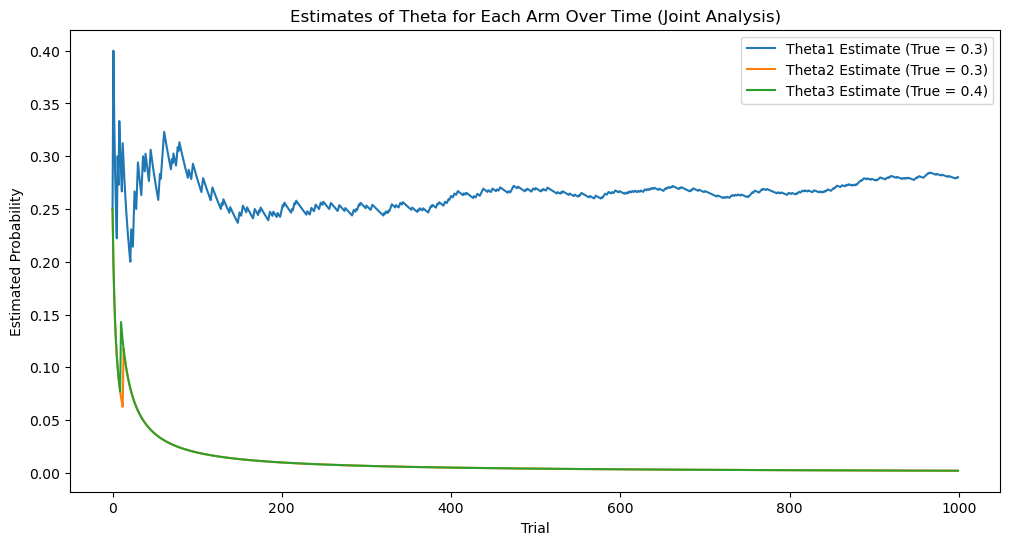

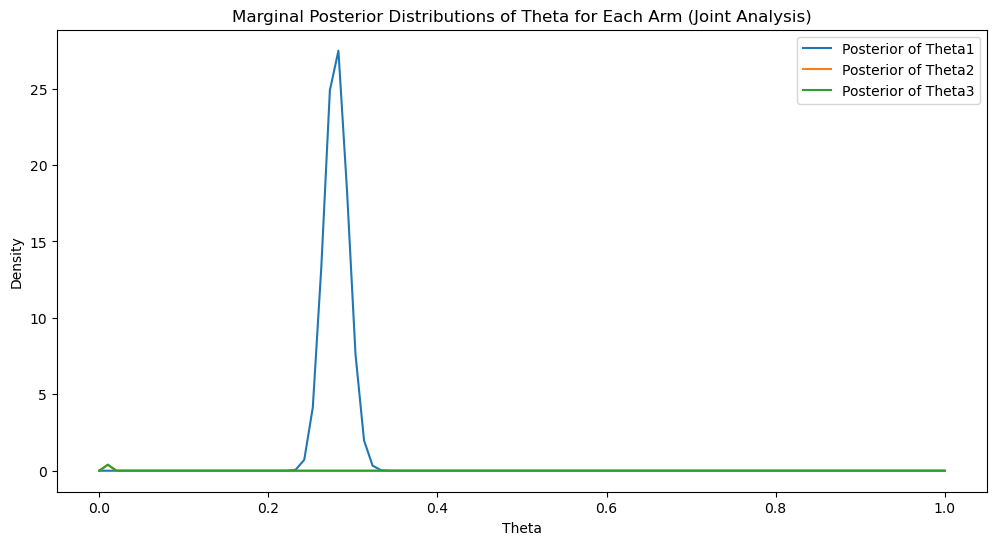

In [12]:
from scipy.stats import dirichlet, beta

np.random.seed(42)
theta_true = [0.3, 0.3, 0.4]
m = 1000

# Prior parameters for Dirichlet distribution
alpha = np.ones(3) 

# Bayesian Multi-Armed Bandit Algorithm
n = np.zeros(3)
x = np.zeros(3)
theta_estimates = [[] for _ in range(3)]

for t in range(m):
    theta_sample = dirichlet.rvs(alpha + x, size=1)[0]
    chosen_arm = np.argmax(theta_sample)
    reward = np.random.binomial(1, theta_true[chosen_arm])
    n[chosen_arm] += 1
    x[chosen_arm] += reward
    
    for i in range(3):
        theta_estimates[i].append((alpha[i] + x[i]) / (alpha.sum() + n.sum()))

# Plot the estimates over time
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(theta_estimates[i], label=f'Theta{i+1} Estimate (True = {theta_true[i]})')
plt.xlabel('Trial')
plt.ylabel('Estimated Probability')
plt.title('Estimates of Theta for Each Arm Over Time (Joint Analysis)')
plt.legend()
plt.show()

# Plot the final marginal posterior distributions
theta_values = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 6))
for i in range(3):
    posterior_theta = beta.pdf(theta_values, alpha[i] + x[i], alpha.sum() - alpha[i] + n.sum() - x[i])
    plt.plot(theta_values, posterior_theta, label=f'Posterior of Theta{i+1}')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Marginal Posterior Distributions of Theta for Each Arm (Joint Analysis)')
plt.legend()
plt.show()

**Discussion**

Analysis 1 (independent analysis using beta-binomial Model) allows for separate learning of each arm's probability, which is suitable for situations where arms are completely independent and there is no correlation between them. One the other hand, Analysis 2 (joint analysis using Dirichlet-multinomial Model allows any potential correlation between arms and allows for shared learning across arms, which is suitable for arms are related or when combined information can improve learning.

Bayesian multi-armed bandit approach helps balance the exploration-exploitation tradeoff by continuously learning and adapting based on observed data, leading to more efficient and effective AB testing.Therefore, I could deploy this approach in a real-world AB testing context such as online advertising.Testing different ad creatives to determine which one has the highest click-through rate. The independent analysis approach would be suitable if each ad creative is targeting a different audience segment, while the joint analysis approach would be suitable if the ad creatives are targeting the same audience and there is potential correlation in user behavior.